# Lab 1 Samuel Bieberich

## Section 1.a

Digital filters are broadly classified into FIR and IIR filters. Give an
example of an FIR filter and IIR filter (transfer function). Plot the transfer
function in Python. Identify the poles and zeros on the plot.

In [45]:
#imports cell 

#may need to install scipy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal

In [46]:
#The FIR filter example I chose (arbitrary numbers) is as follows:



In [47]:
#plotting the filter response

In [48]:
#plotting the poles and zeros

In [49]:
#The IIR filter example I chose is as follows:

In [50]:
#plotting filter response 

In [51]:
#plotting the poles and zeroes

## Section 1.b

Identify the FIR and IIR filter. Plot the FIR filter in (use freqz function in
the SciPy signal processing toolbox). Where are the poles and zeros of the
filter located? Validate your theory using simulations.

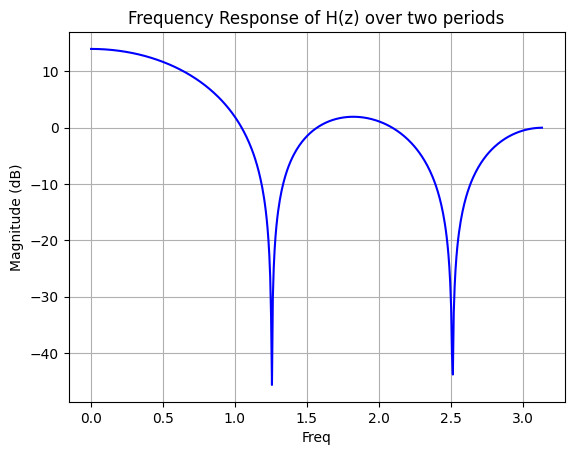

In [52]:
#modeling the FIR filter with freqz from scipy

b = [1, 1, 1, 1, 1]  #coefficients of H
a = 1 

w, H = signal.freqz(b, a)

plt.figure()
plt.title('Frequency Response of H(z) over two periods')
plt.plot(w, 20 * np.log10(abs(H)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Freq')
plt.grid(True)
plt.show()

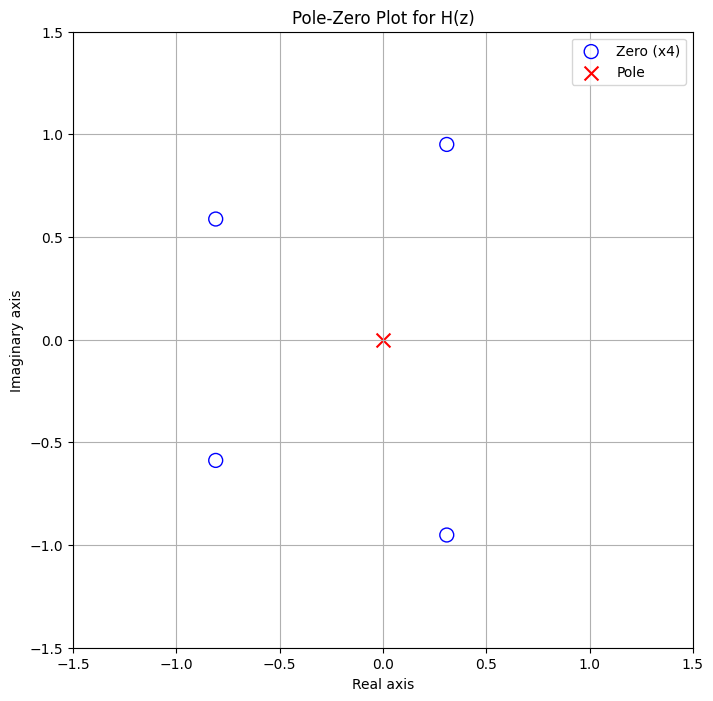

In [53]:
#showing the poles and zeroes

zeros = np.roots(b)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(zeros.real, zeros.imag, marker='o', facecolors='none', edgecolors='b', s=100, label='Zero (x4)')

ax.scatter(0, 0, marker='x', color='r', s=100, label='Pole')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_title('Pole-Zero Plot for H(z)')
ax.grid(True)
ax.legend()

plt.show()


## Section 1.c

Comment on the stability of the FIR and IIR filters. Use simple simulations
to explain your ideas.

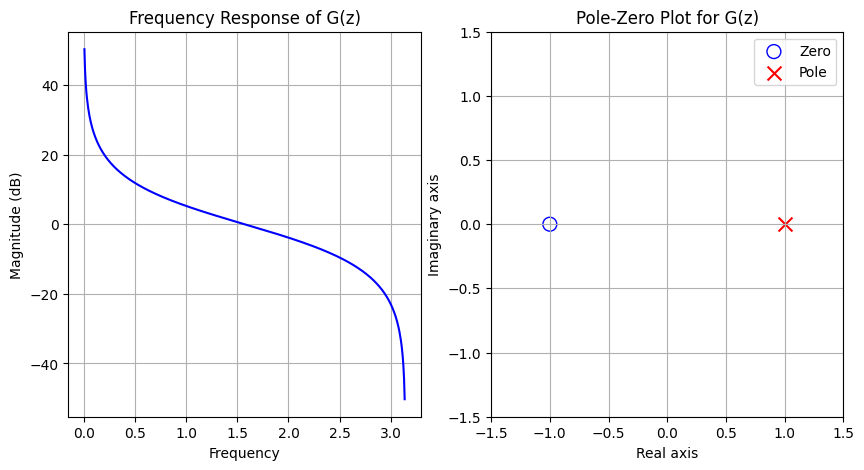

In [54]:
#same for the iir filter 

b = [1, 1]  
a = [1, -1]  

w, h = signal.freqz(b, a)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Frequency Response of G(z)')
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Magnitude (dB)')
plt.xlabel('Frequency')
plt.grid(True)

zeros = np.roots(b)
poles = np.roots(a)

plt.subplot(122)
plt.title('Pole-Zero Plot for G(z)')
plt.scatter(zeros.real, zeros.imag, marker='o', facecolors='none', edgecolors='b', s=100, label='Zero')
plt.scatter(poles.real, poles.imag, marker='x', color='r', s=100, label='Pole')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.grid(True)
plt.legend()

plt.show()

## Section 2.a

Consider the two signals $x_1(t) = \cos(2\pi\cdot F_1 \cdot t)$ and $x_2(t) = \cos(2\pi\cdot F_2 \cdot t)$, where $F_1 = 300\text{MHz}$ and $F_2 = 800\text{MHz}$. Both these signals are sampled at the same sampling frequency $F_s = 500\text{MHz}$. What can you say about the sampled data $x_1(n)$ and $x_2(n)$? Explain with simulations why this happens.

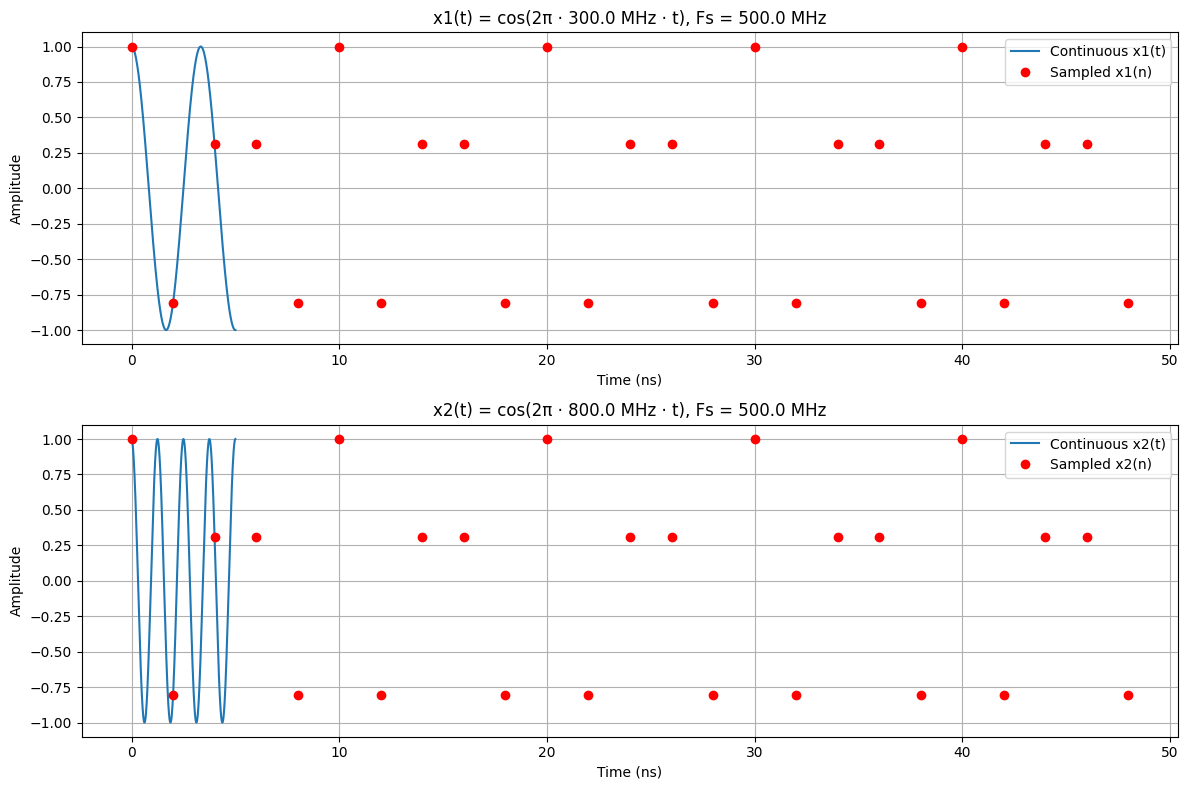

Sampled values of x1(n): [ 1.         -0.80901699  0.30901699  0.30901699 -0.80901699  1.
 -0.80901699  0.30901699  0.30901699 -0.80901699  1.         -0.80901699
  0.30901699  0.30901699 -0.80901699  1.         -0.80901699  0.30901699
  0.30901699 -0.80901699  1.         -0.80901699  0.30901699  0.30901699
 -0.80901699]
Sampled values of x2(n): [ 1.         -0.80901699  0.30901699  0.30901699 -0.80901699  1.
 -0.80901699  0.30901699  0.30901699 -0.80901699  1.         -0.80901699
  0.30901699  0.30901699 -0.80901699  1.         -0.80901699  0.30901699
  0.30901699 -0.80901699  1.         -0.80901699  0.30901699  0.30901699
 -0.80901699]


In [55]:
# Define parameters
F1 = 300e6 
F2 = 800e6 
Fs = 500e6  

# Time array for continuous signals (for plotting)
t = np.linspace(0, 5e-9, 1000)  # 5 ns, 1000 points

# Continuous signals
x1 = np.cos(2 * np.pi * F1 * t)
x2 = np.cos(2 * np.pi * F2 * t)

# Sampled time points
n = np.arange(0, 25)  # 25 sample points
t_sampled = n / Fs

# Sampled signals
x1_sampled = np.cos(2 * np.pi * F1 * t_sampled)
x2_sampled = np.cos(2 * np.pi * F2 * t_sampled)

# Plotting
plt.figure(figsize=(12, 8))

# Plot x1
plt.subplot(2, 1, 1)
plt.plot(t*1e9, x1, label='Continuous x1(t)')
plt.plot(t_sampled*1e9, x1_sampled, 'ro', label='Sampled x1(n)')
plt.title(f'x1(t) = cos(2π · {F1/1e6} MHz · t), Fs = {Fs/1e6} MHz')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot x2
plt.subplot(2, 1, 2)
plt.plot(t*1e9, x2, label='Continuous x2(t)')
plt.plot(t_sampled*1e9, x2_sampled, 'ro', label='Sampled x2(n)')
plt.title(f'x2(t) = cos(2π · {F2/1e6} MHz · t), Fs = {Fs/1e6} MHz')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print sampled values
print("Sampled values of x1(n):", x1_sampled)
print("Sampled values of x2(n):", x2_sampled)


## Section 2.b

Can you recover the signals $x_1(t)$ and $x_2(t)$ from $x_1(n)$ and $x_2(n)$. If not, what is your suggestion to overcome this problem?

## Section 2.c

Find the ideal signal reconstruction (interpolation) equation for a zero-order hold sampling system with pulse width $W$ and sampling rate $T$. Assume that Nyquist rate criteria is satisfied and the sampling point is at the end of the pulse width.

## Section 2.d

Sample the signal $x_1(t)$ using $F_s = 800\text{MHz}$ at $0:T_s:T-T_s$, where $T = 10/F_1$ (i.e. 10 cycles of the cosine wave) and $T_s = 1/F_s$. Reconstruct the signal from the samples using the formula

$x_r(t) = \sum_{n=-\infty}^{\infty} x(n) \frac{\sin[\pi(t-nT_s)/T_s]}{\pi(t-nT_s)/T_s}$

Now sample the signal at $T_s/2:T_s:T-T_s/2$ i.e. the samples are shifted by $T_s/2$. Reconstruct the signal using the same formula. Compute the error in the reconstruction in both the cases by the method of mean squares given by,

$
MSE = \text{mean}((x(t) - x_r(t))^2)
$

## Section 2.e

Repeat d. for $F_s = 1000\text{MHz}$ and $F_s = 500\text{MHz}$. Report your observations.

## Section 3.a

Consider the signal $x(t) = \cos(2\pi\cdot F\cdot t)$ where $F = 2\text{MHz}$. Sample the signal at $F_s = 5\text{MHz}$. Compute a 50 point DFT in Python and plot the output. (see fft command in SciPy documentation).

## Section 3.b

Consider another signal $y(t) = \cos(2\pi\cdot F_1 \cdot t) + \cos(2\pi\cdot F_2 \cdot t)$ where $F_1 = 200\text{MHz}$ and $F_2 = 400\text{MHz}$. Sample this signal at $F_s = 1\text{GHz}$. Compute and plot a 50 point DFT. Can you identify the two components of the signal in the plot?

## Section 3.c

Repeat b. using $F_s = 500\text{MHz}$. Explain what you observe in your DFT plot.

## Section 3.d

Now apply a Blackman window as an envelope to the signal $x(t)$ and $y(t)$ and repeat the analysis. Please explain the differences.